# Missing Values- Feature Engineering

Life cycle of a Data Science Projects
1. Data Collectio Statergy(Pending topic for me) ----- from company side, 3rd party api's, Surveys
2. Features Engineering-------Handling Missing Values,


Why are their Missing values?? Survey--Depression Survey------
1. They hesitate to put down the information
2. survey informations are not valid
3. Men-----Salary
4. Women----age
5.People may have died ---NaN

Data Science Projects ---- Dataset should be collected from multiple sources

#### What are the different types of missing data?

#### 1. Missing completely at Random:

A variable is missing completely at random (MCAR) if the probability of being missing is the same 
for all the observations. When data is MCAR, there is absoluetly no relationship between the missing
data and any other values, observed or missing, within the dataset. In other words, those missing
data points are random subset of the data. There is nothing systemetic going on that makes some 
data more likely to be missing than other.

In [133]:
import pandas as pd

In [134]:
df=pd.read_csv('titanic.csv') 

In [135]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [136]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [137]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [138]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


## 2. Missing data Not At Random(MNAR) systematic missing values
When data is MCAR, there is absoluetly some  relationship between the missing data and any other values, observed or missing, within the dataset

In [139]:
df[df['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [140]:
df['Cabin'].isnull().sum()

687

In [141]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

## find percentage of null values
df['cabin_null'].mean()


0.7710437710437711

In [142]:
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)
# in cabin column if any cell contains null it will replace by 1 otherwise it will replace by 0

In [143]:
df['cabin_null']

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: cabin_null, Length: 891, dtype: int32

In [144]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [145]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

## Missing At Random(MAR)

Men----- hide their salary
Women----hide their age 

### All the techniques of handling missing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitary imputation
6. Frequent categories imputation

## Mean/ Median/ Mode imputation
when should we apply?
Mean/ Median imputation has the assumption that the data are missing completely at random(MCAR).
solve this by replacing the NAN with the most frequent occurance of the variables.

In [148]:
df=pd.read_csv("titanic.csv",usecols=['Age','Fare','Survived'])

In [149]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [150]:
## lets go and see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [151]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [152]:
median=df.Age.median()

In [153]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [154]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [155]:
import matplotlib.pyplot as plt
%matplotlib inline

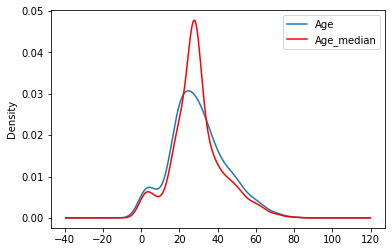

In [156]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

### Advantages and disadvantages of Mean/Median Imputation

#### Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset
#### Disadvantages
1. change or Distration in the orginal variance 
2. impacts correlation

### Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

when should it be used?
It assumes that the data are missing completely at random(MCAR)

In [157]:
df.isnull().sum()

Survived        0
Age           177
Fare            0
Age_median      0
dtype: int64

In [158]:
df.isnull().mean()

Survived      0.000000
Age           0.198653
Fare          0.000000
Age_median    0.000000
dtype: float64

In [159]:
df['Age'].dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [160]:
df['Age'].isnull().sum()

177

In [161]:
help(df['Age'].dropna().sample)

Help on method sample in module pandas.core.generic:

sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None) -> 'FrameOrSeries' method of pandas.core.series.Series instance
    Return a random sample of items from an axis of object.
    
    You can use `random_state` for reproducibility.
    
    Parameters
    ----------
    n : int, optional
        Number of items from axis to return. Cannot be used with `frac`.
        Default = 1 if `frac` = None.
    frac : float, optional
        Fraction of axis items to return. Cannot be used with `n`.
    replace : bool, default False
        Allow or disallow sampling of the same row more than once.
    weights : str or ndarray-like, optional
        Default 'None' results in equal probability weighting.
        If passed a Series, will align with target object on index. Index
        values in weights not found in sampled object will be ignored and
        index values in sampled object not in weights will be 

In [162]:
df['Age'].dropna().sample(df['Age'].isnull().sum())

575    19.0
721    17.0
482    50.0
237     8.0
799    30.0
       ... 
211    35.0
97     23.0
15     55.0
194    44.0
679    36.0
Name: Age, Length: 177, dtype: float64

In [163]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [164]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [165]:
def impute_nan(df,variable,median):
    # all the NAN values replaced by median 
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ## It will have the random sample to fill the 
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ## Pandas needs to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index  
    ### All NAN values replaced by random sample
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [166]:
median=df.Age.median()

In [167]:
median

28.0

In [168]:
impute_nan(df,"Age",median)

In [169]:
df

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


In [170]:
import matplotlib.pyplot as plt
%matplotlib inline


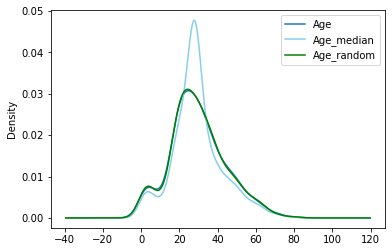

In [171]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='skyblue')
df.Age_random.plot(kind='kde',ax=ax,color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

### Advantages
1. it is easy to implement
2. there is no distortion in variance

### Disadvantages
1. Every situation randomness won't work


### Capturing NAN values with a new feature

It works well if the data are not missing completely at random

In [172]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [173]:
import numpy as np
 
df['Age_NAN'] = np.where(df['Age'].isnull(),1,0)

In [174]:
df.Age_NAN.head()

0    0
1    0
2    0
3    0
4    0
Name: Age_NAN, dtype: int32

In [175]:
df.loc[df["Age_NAN"]==0,["Age_NAN"]].head()

,Age_NAN
0,0
1,0
2,0
3,0
4,0


In [176]:
df.Age.median()

28.0

In [177]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [178]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


#### Advantages

1. Easy to implement
2. Captures the importance of missing values

#### Disadvantages

1. Creating Additional Features(Curse of Dimensionality)

### End of Distribution imputation

In [179]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

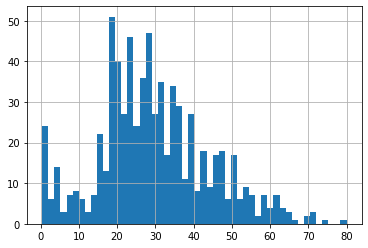

In [180]:
df.Age.hist(bins=50)

In [181]:
extreme=df.Age.mean()+3*df.Age.std()

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

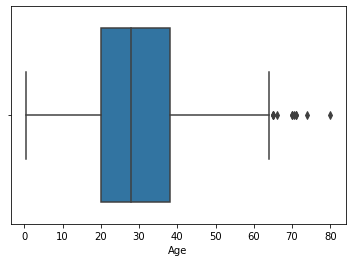

In [182]:
import seaborn as sns
sns.boxplot('Age',data=df)


In [183]:
def impute_nan(df,variable,medium,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [184]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [185]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [186]:
df.loc[df['Age_end_distribution']==extreme,['Age_end_distribution']].head()

,Age_end_distribution
5,73.27861
17,73.27861
19,73.27861
26,73.27861
28,73.27861


<AxesSubplot:>

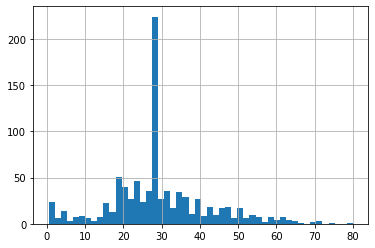

In [187]:
df['Age'].hist(bins=50)

<AxesSubplot:>

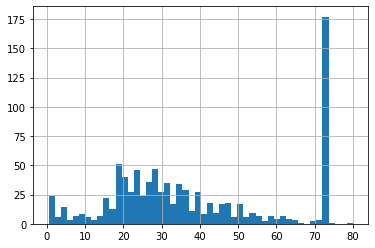

In [188]:
df['Age_end_distribution'].hist(bins=50)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

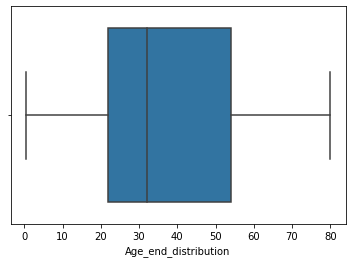

In [189]:
sns.boxplot('Age_end_distribution',data=df)

### Aribitrary value imputation

This technique was derived from koggle competation
It consists of replacing NAN by an arbitrary value


In [192]:
import pandas as pd

In [194]:
df = pd.read_csv("titanic.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [197]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

<AxesSubplot:>

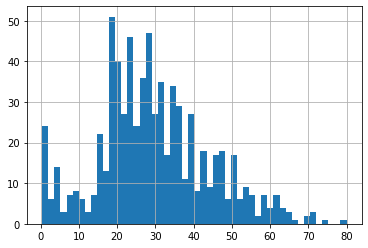

In [198]:
df.Age.hist(bins=50)

In [ ]:
### Arbitrary values
###1. It should be more frequently present 


#### Advantages

* Easy to implement 
* Captures the importance of missingess if there is one

#### Disadvantage

* Distorts the orginal distribution of the variable
* If missingess is not important, it may mask the predective power of the orginal variable  by distorting its distribution 
* Hard to decide which value to use